# Point Process Analysis Aggregation
A framework for evaluating the performance of centroid and proportional allocation approaches.

In [15]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import sys
import os
sys.path.insert(0, './src')

from src.aggregation import *
from src.point_processes_1d import *
from src.visualization import *
from src.simulation1d import *
import matplotlib.pyplot as plt
import numpy as np
N = 500
# dg = np.linspace(0.01, 0.99, N)
# dg = np.logspace(-3, -0.01, N)
dg = np.logspace(-3, -0.01, N)
# dg = np.logspace(-3, 0.693, N)
dp = 0.5*np.ones(N)
ratio = dp / dg
rate = 100
start = -3
end = 4


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Empirical evaluation of homogeneous and non-homogeneous point process
Empirically compare proportional allocation and centroid allocation approaches under three forms of point process:
1. Homogeneous Poisson point process
2. Non-homogeneous Neyman Scott process
3. Non-homogeneous Log-Gaussian Cox process

### Generate samples from each type of point process

In [16]:
# Parameters for Poisson Process
N = 200

# Parameters for Neyman-Scott Process
lambda_p = 10
lambda_c = N / lambda_p
sigma = 0.05

# Parameters for log-Gaussian Cox Process
L = 1             # Length of domain
dx = 0.05          # Bin width
mean_log_intensity = np.log(N)  # Mean of log-intensity
variance = 1     # Variance of the Gaussian Process
length_scale = 0.05 # Length scale of covariance

sample_generator = {}
sample_generator['poisson'] = lambda x, start, end: get_poisson_process_samples(x, start, end)
sample_generator['neyman-scott'] = lambda x, start, end: get_neyman_scott_process(lambda_p, x / lambda_p, sigma, start, end)
sample_generator['lgcp'] = lambda x, start, end: get_log_gaussian_cox_process_direct_sampling(dx, np.log(x), variance, length_scale, start, end)

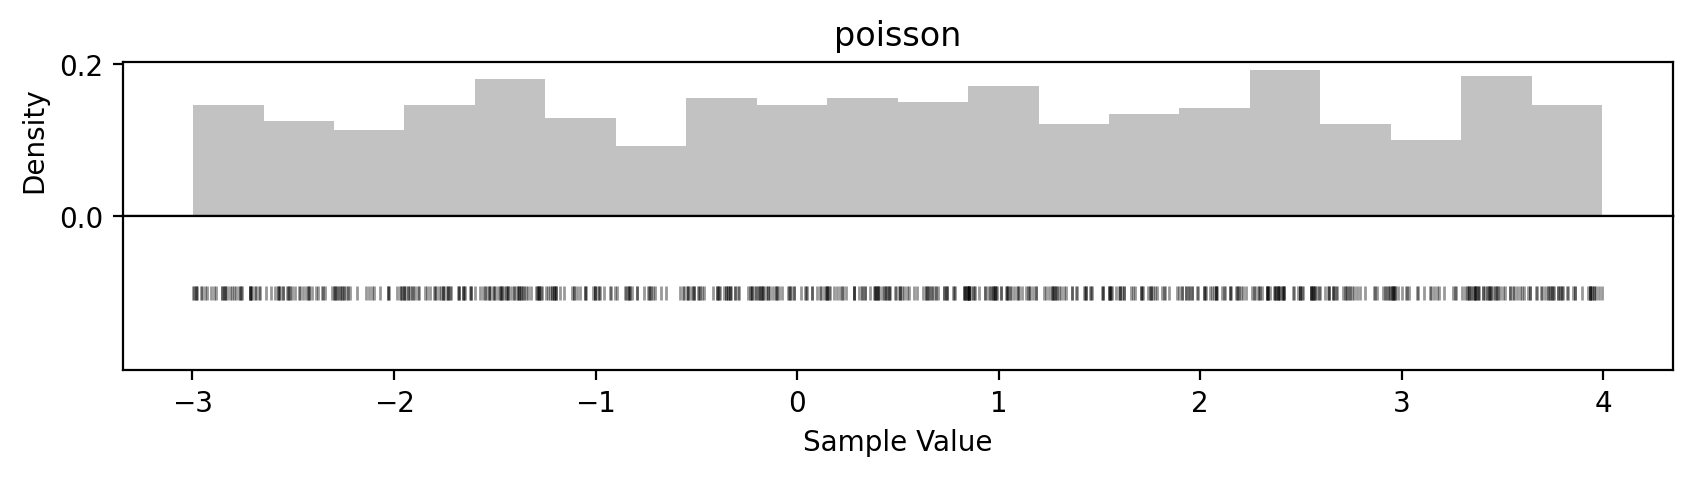

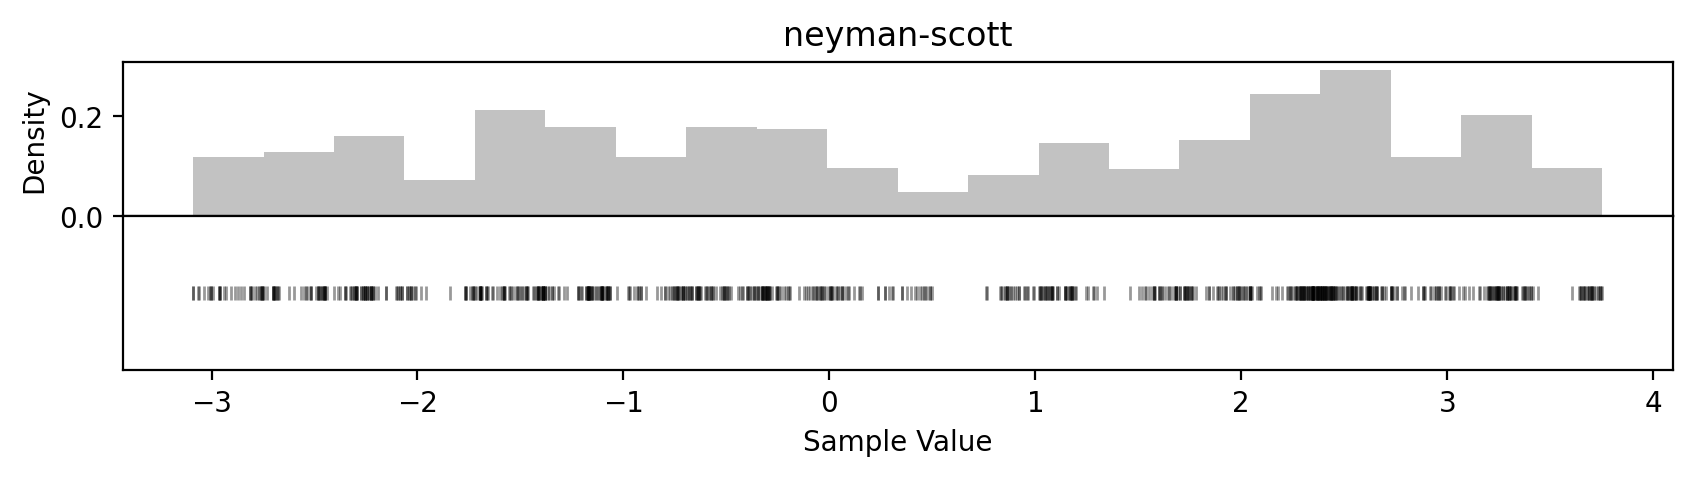

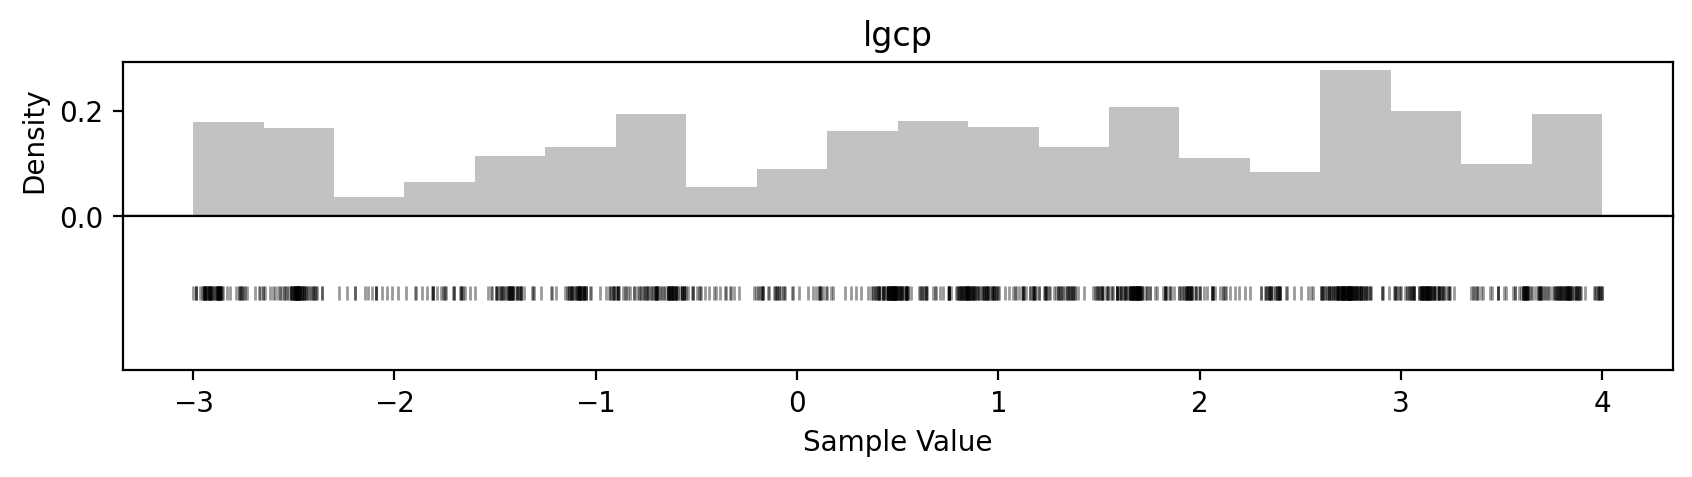

In [17]:
# Plot the samples
for key in sample_generator.keys():
    # Generate samples
    samples = sample_generator[key](rate, start, end)
    plot_one_d_samples(samples, key)


### Run the simulation for one of the point processes assuming the one edge is fixed at $x=0$

100%|██████████| 500/500 [00:13<00:00, 36.67it/s]


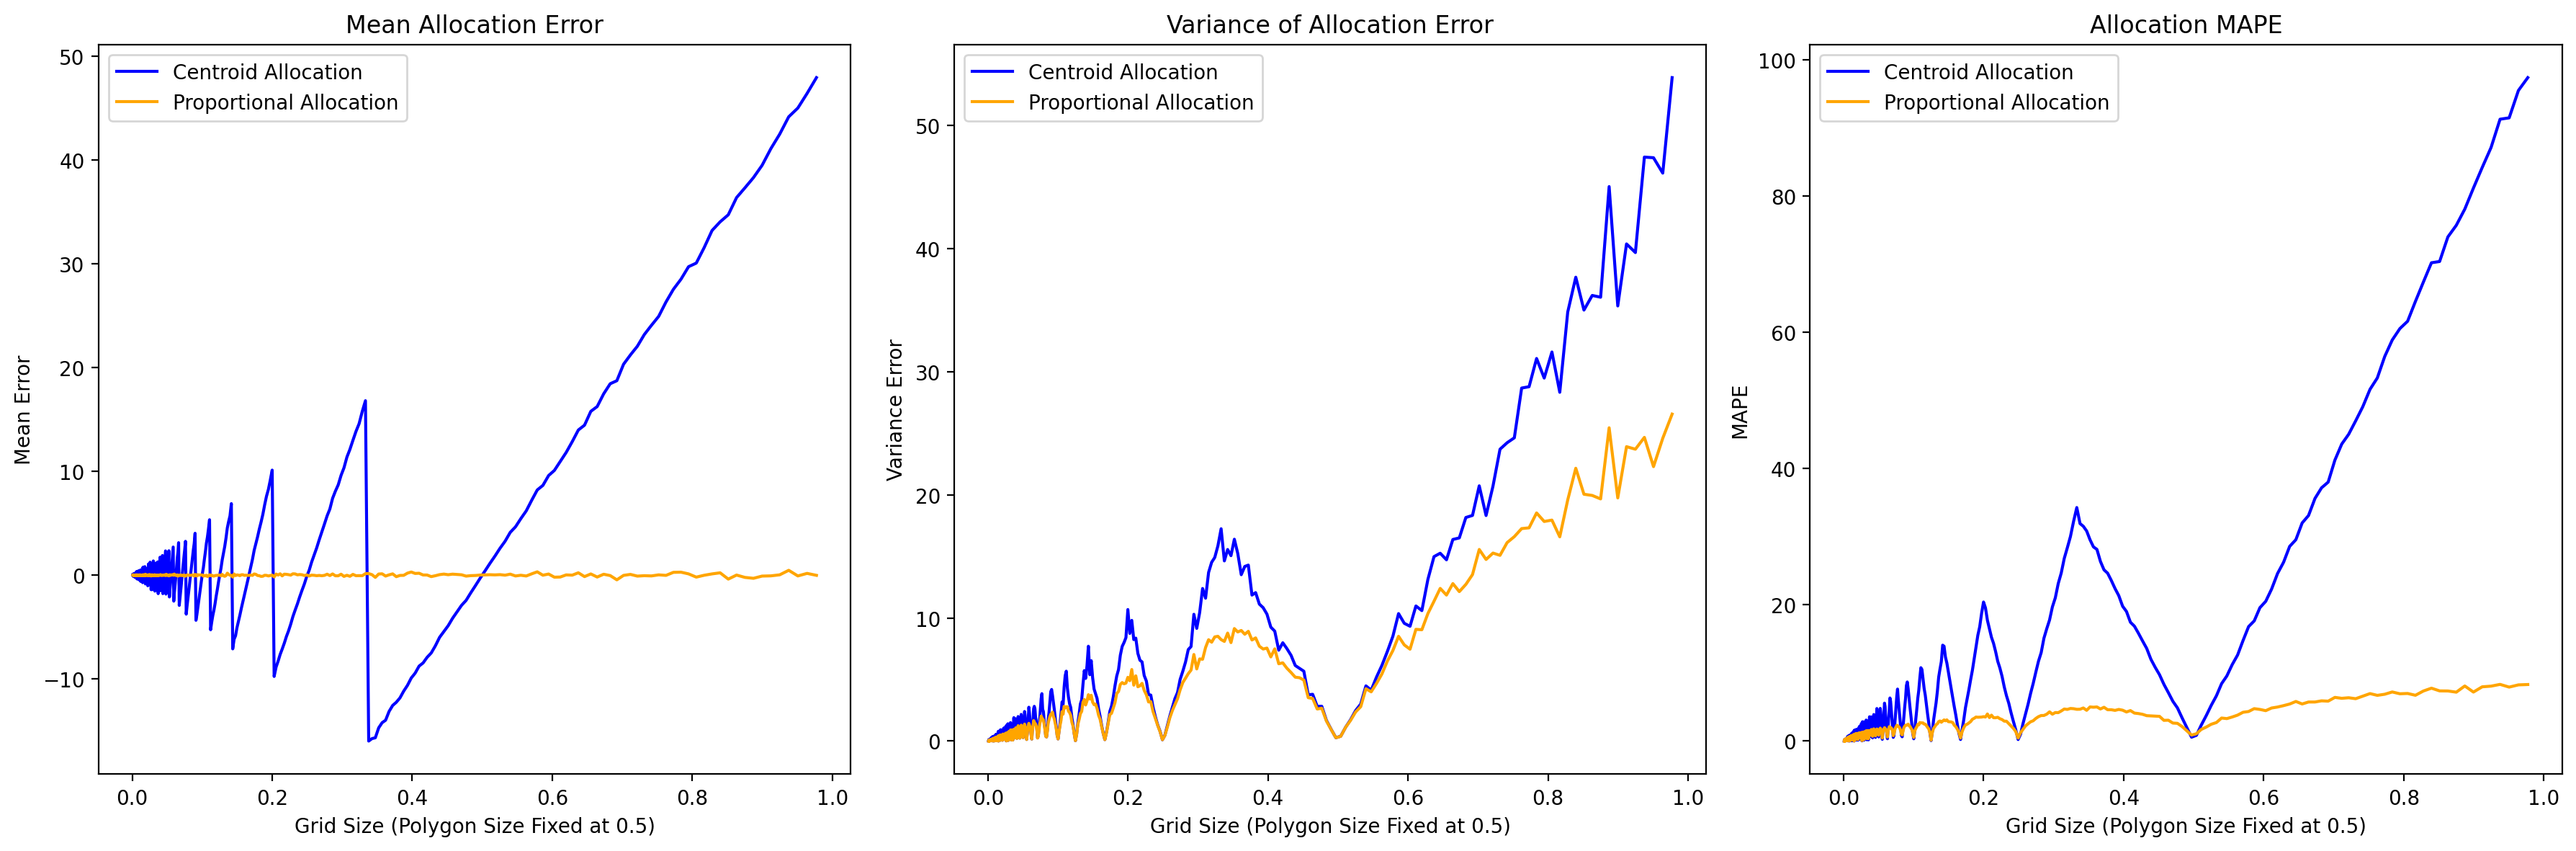

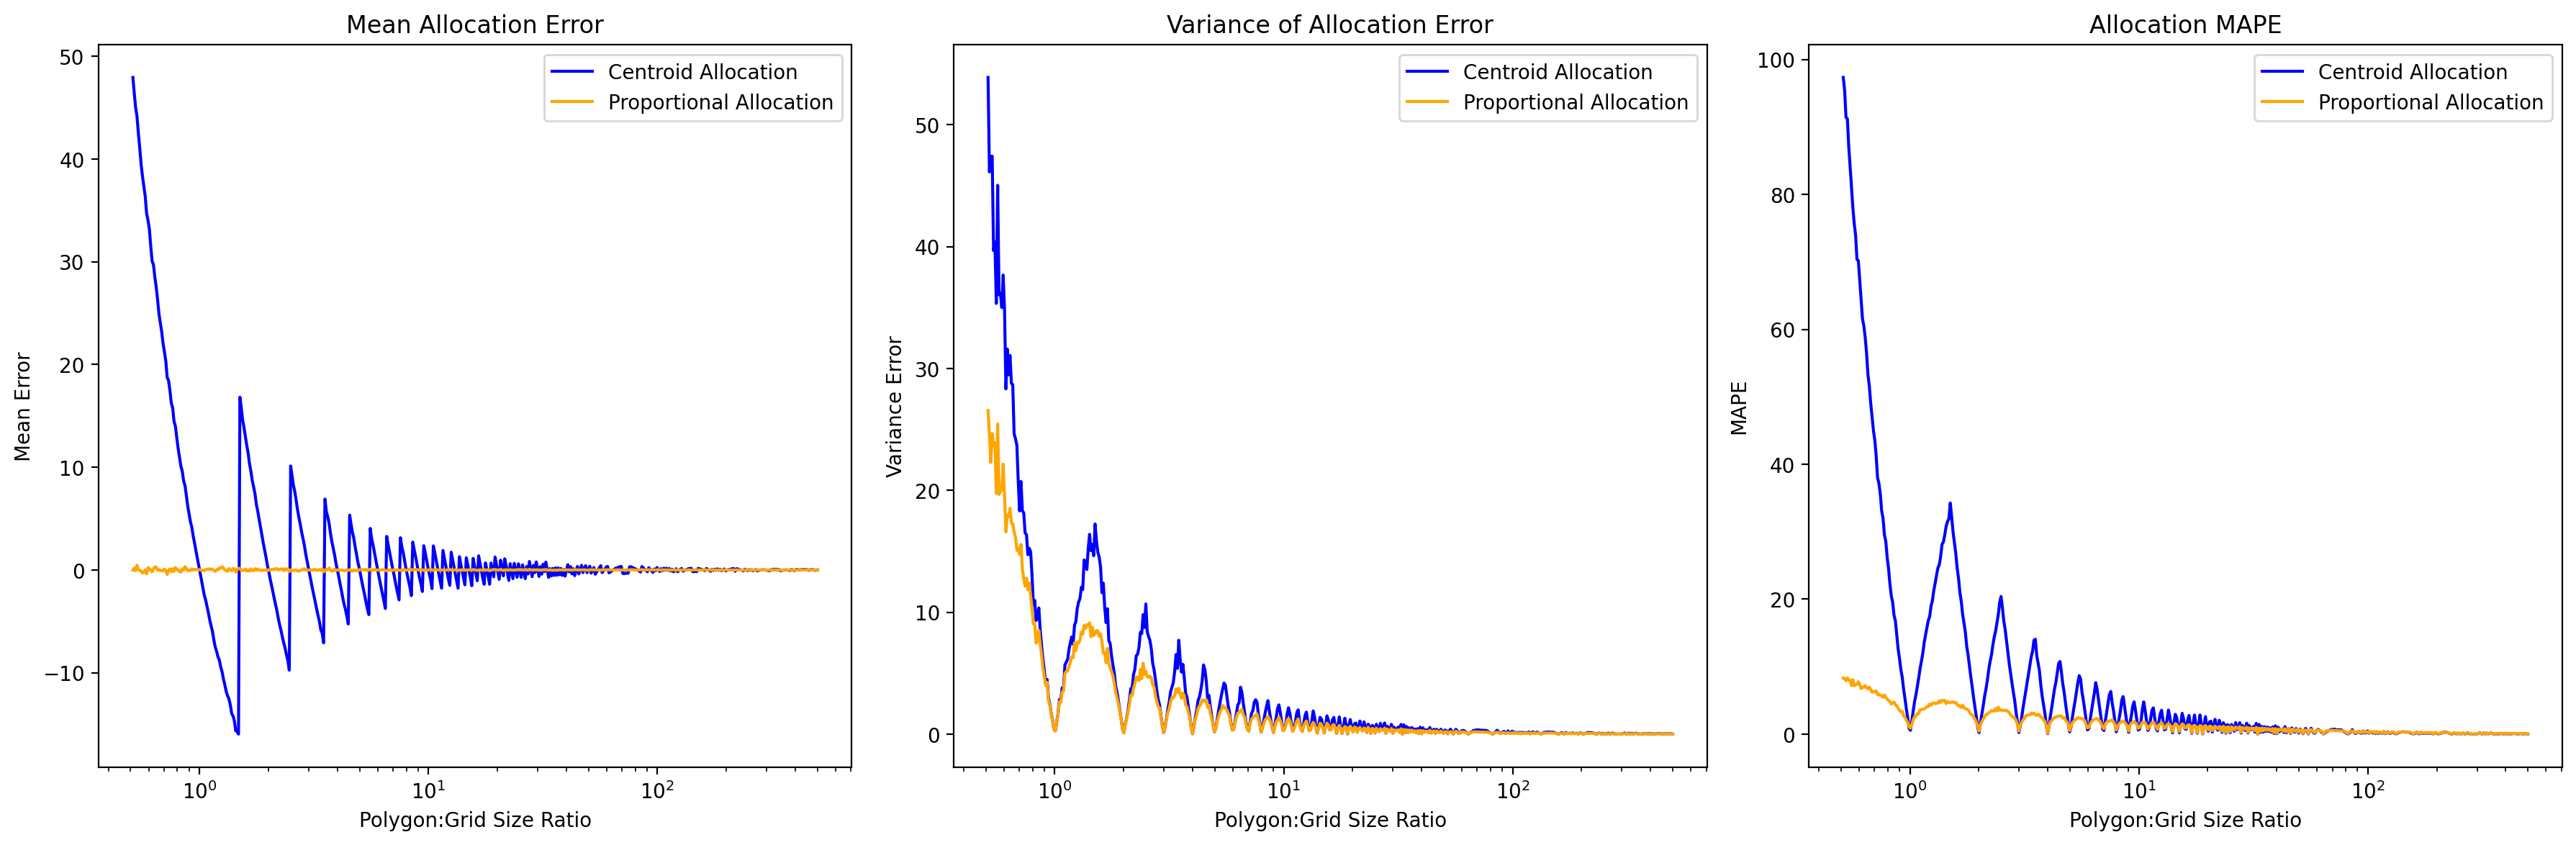

/Users/kyle/Library/CloudStorage/Dropbox/Code/polygon-aggregation/src/visualization.py:83: RuntimeWarning: invalid value encountered in divide
  ax.loglog(dp/dg, np.array(results['mean_mape_centroid']) / np.array(results['mean_mape_proportional']), label='MAPE Ratio - Centroid:Proportional', color='blue')


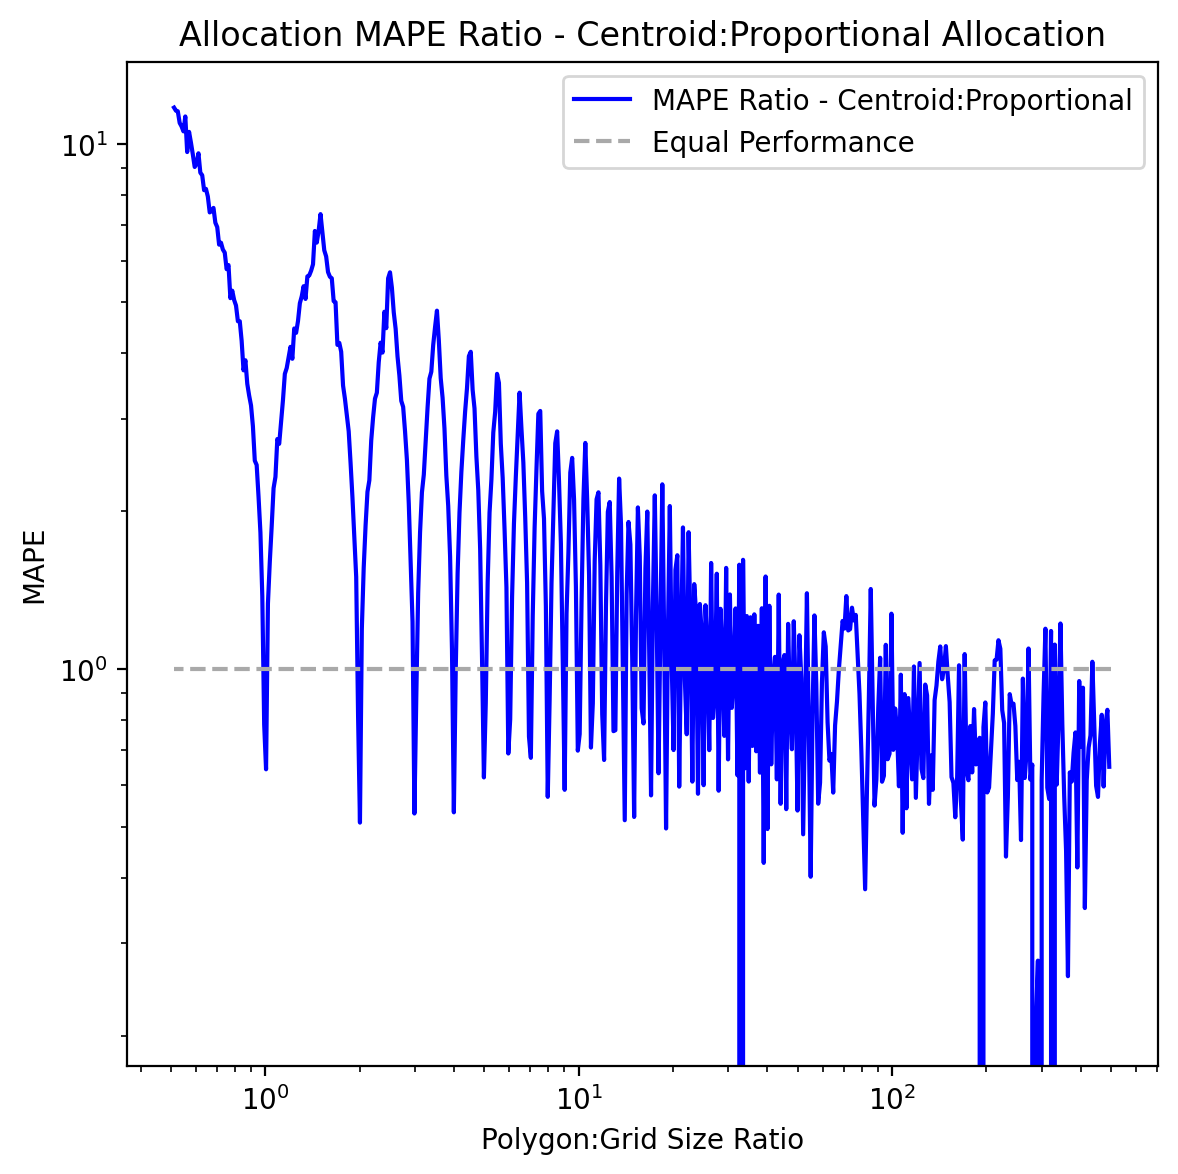

In [18]:
trials = 500
point_process = sample_generator['poisson']
results_fixed_polygon_start = run_simulation_fixed_edge(rate, start, end, trials, dg, dp, point_process)
plot_simulation_results(dg, dp, results_fixed_polygon_start)
plot_simulation_results_ratio(dg, dp, results_fixed_polygon_start)
plot_simulation_error_ratios(dg, dp, results_fixed_polygon_start)

### Run the simulation for one of the point processes randomly setting the edges

100%|██████████| 500/500 [00:19<00:00, 26.09it/s]


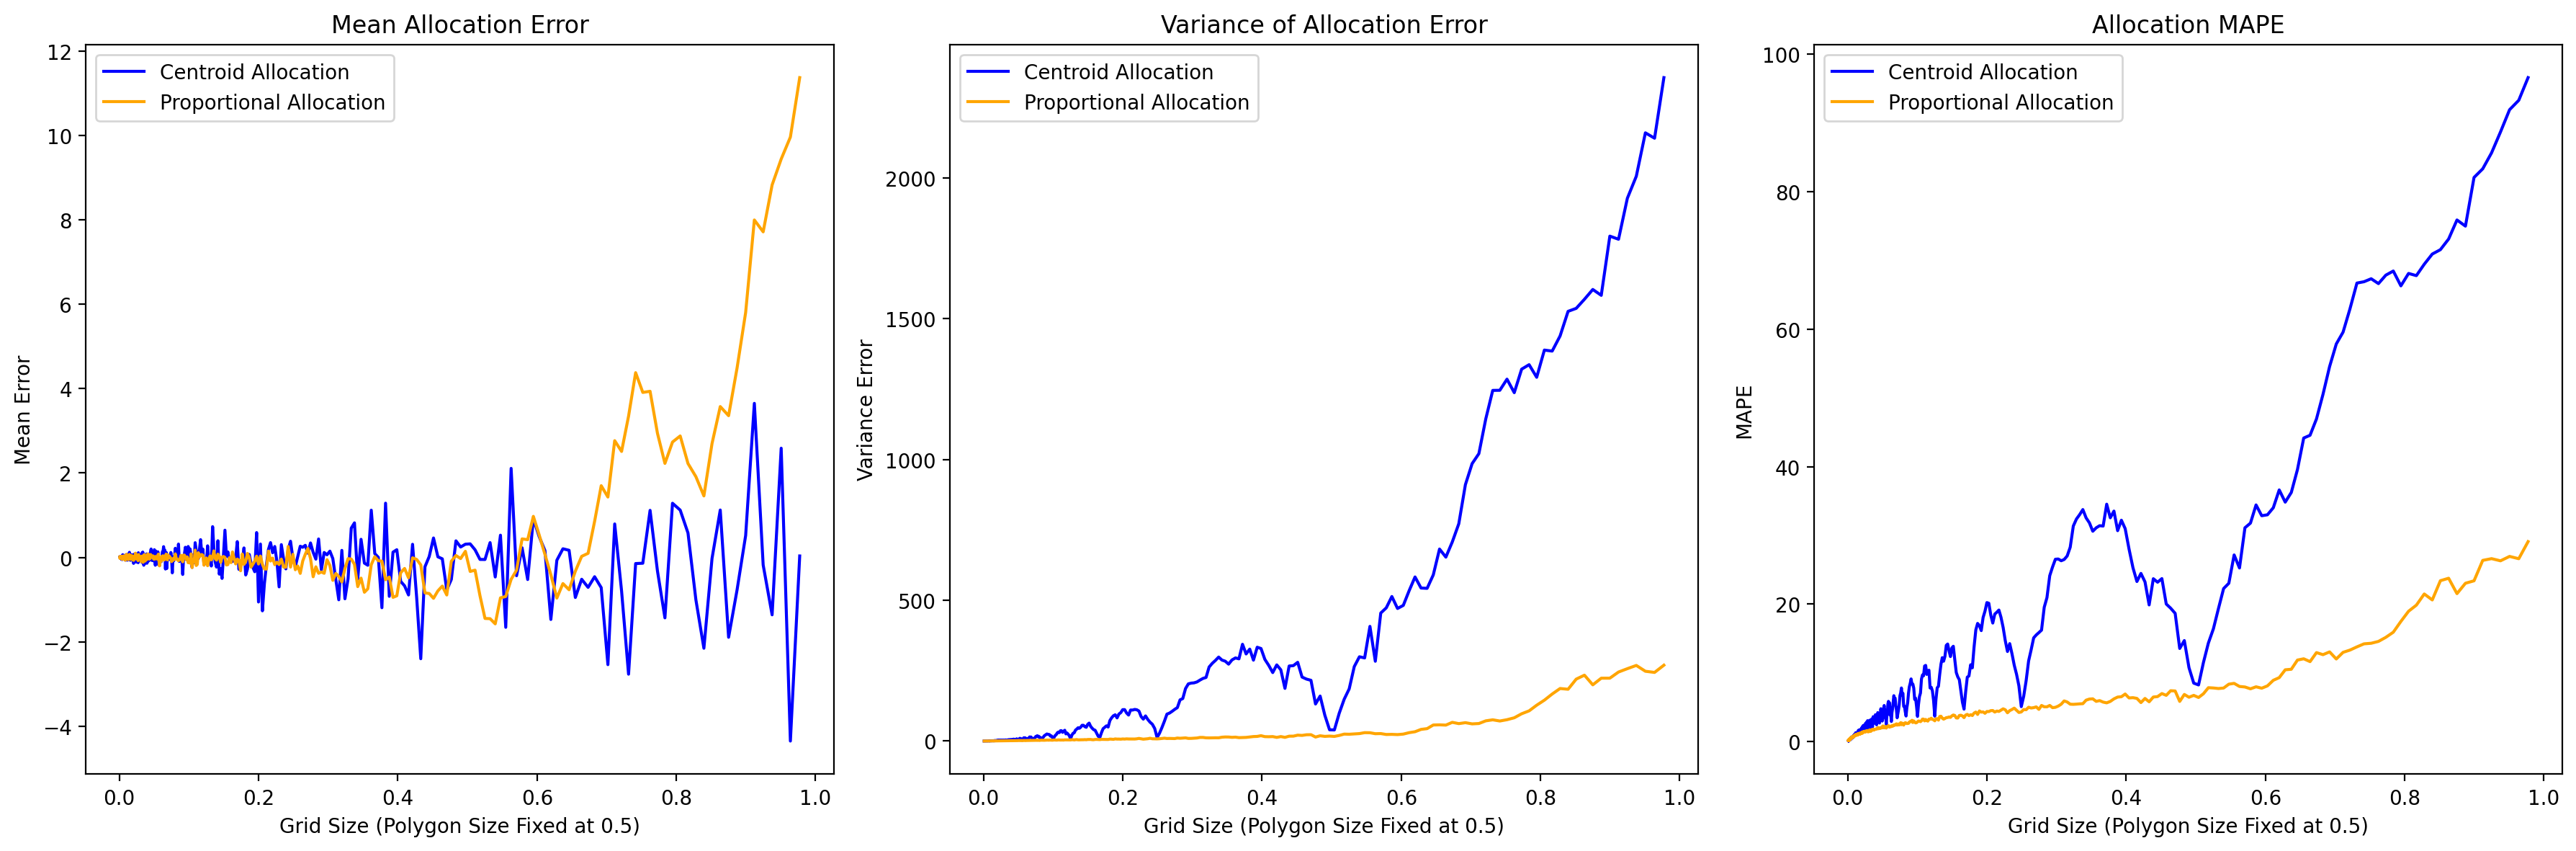

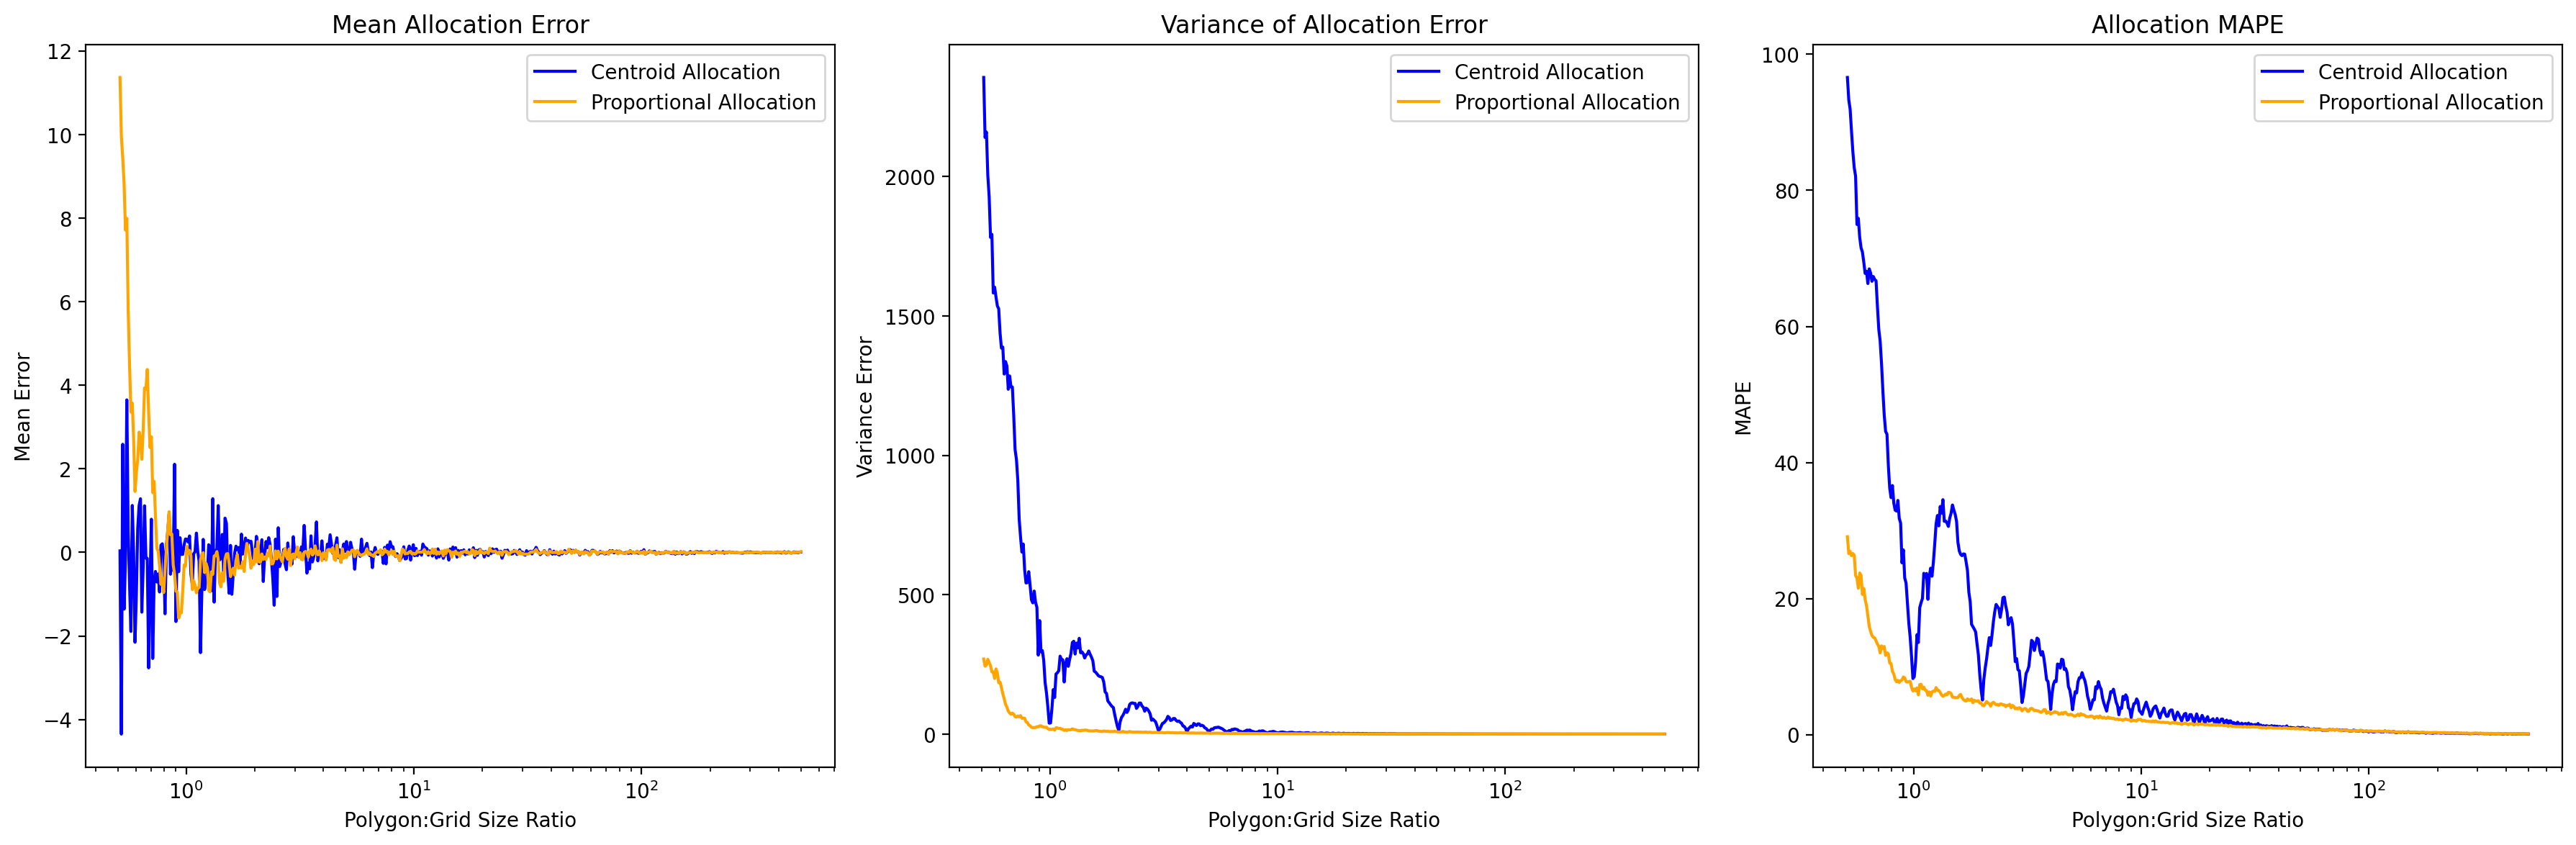

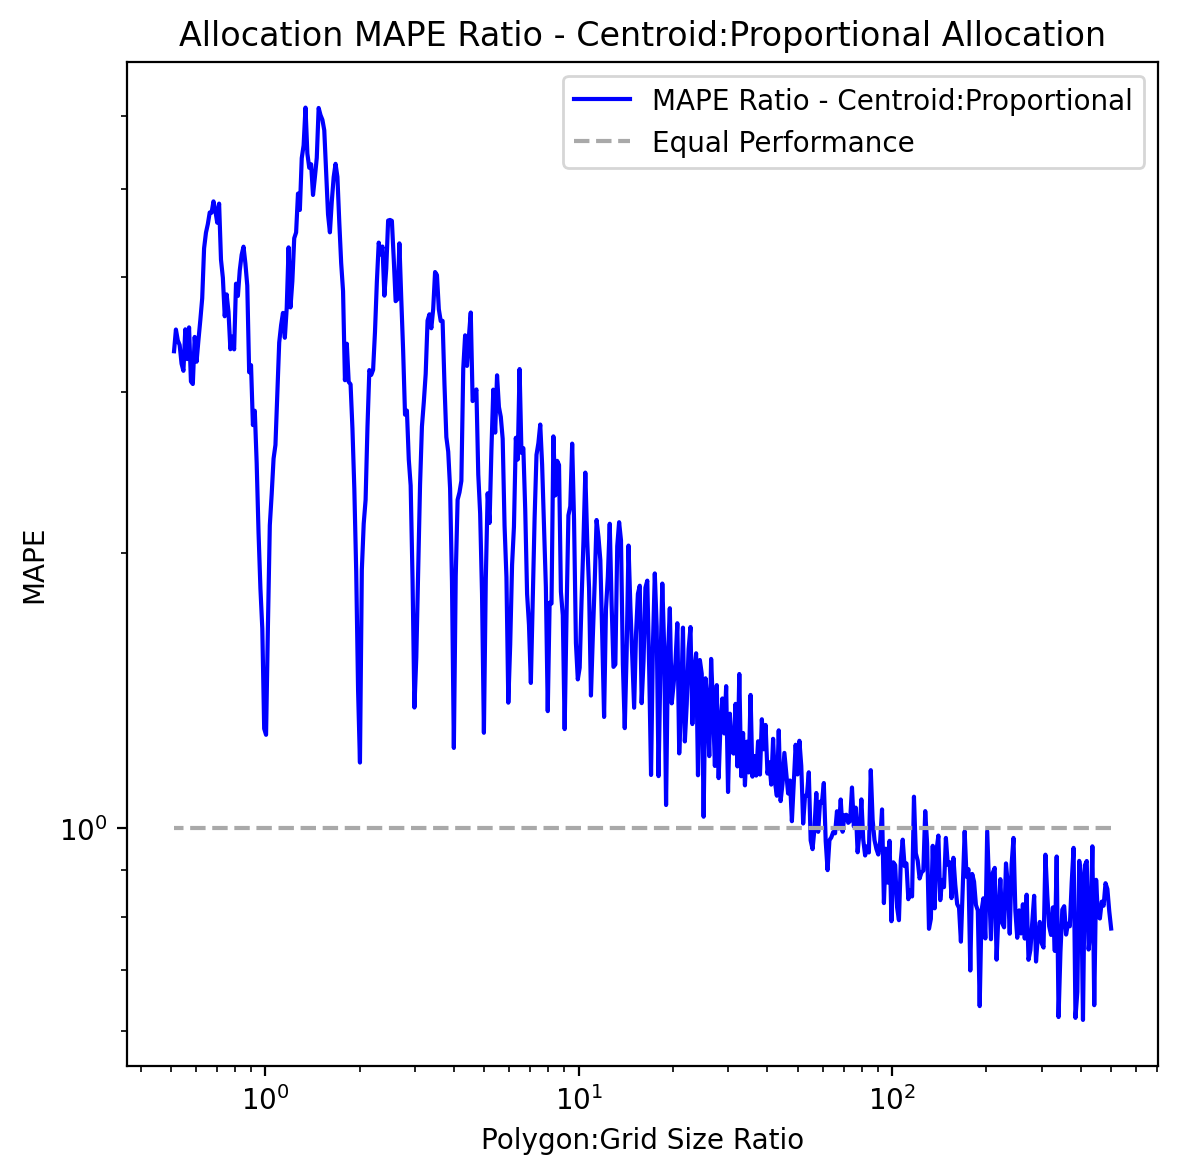

In [19]:
results_random_polygon_start = run_simulation_random_polygon_placement(rate, start, end, trials, dg, dp, point_process)
plot_simulation_results(dg, dp, results_random_polygon_start)
plot_simulation_results_ratio(dg, dp, results_random_polygon_start)
plot_simulation_error_ratios(dg, dp, results_random_polygon_start)

## Allow the grid to randomly vary it's origin

100%|██████████| 500/500 [00:19<00:00, 25.10it/s]


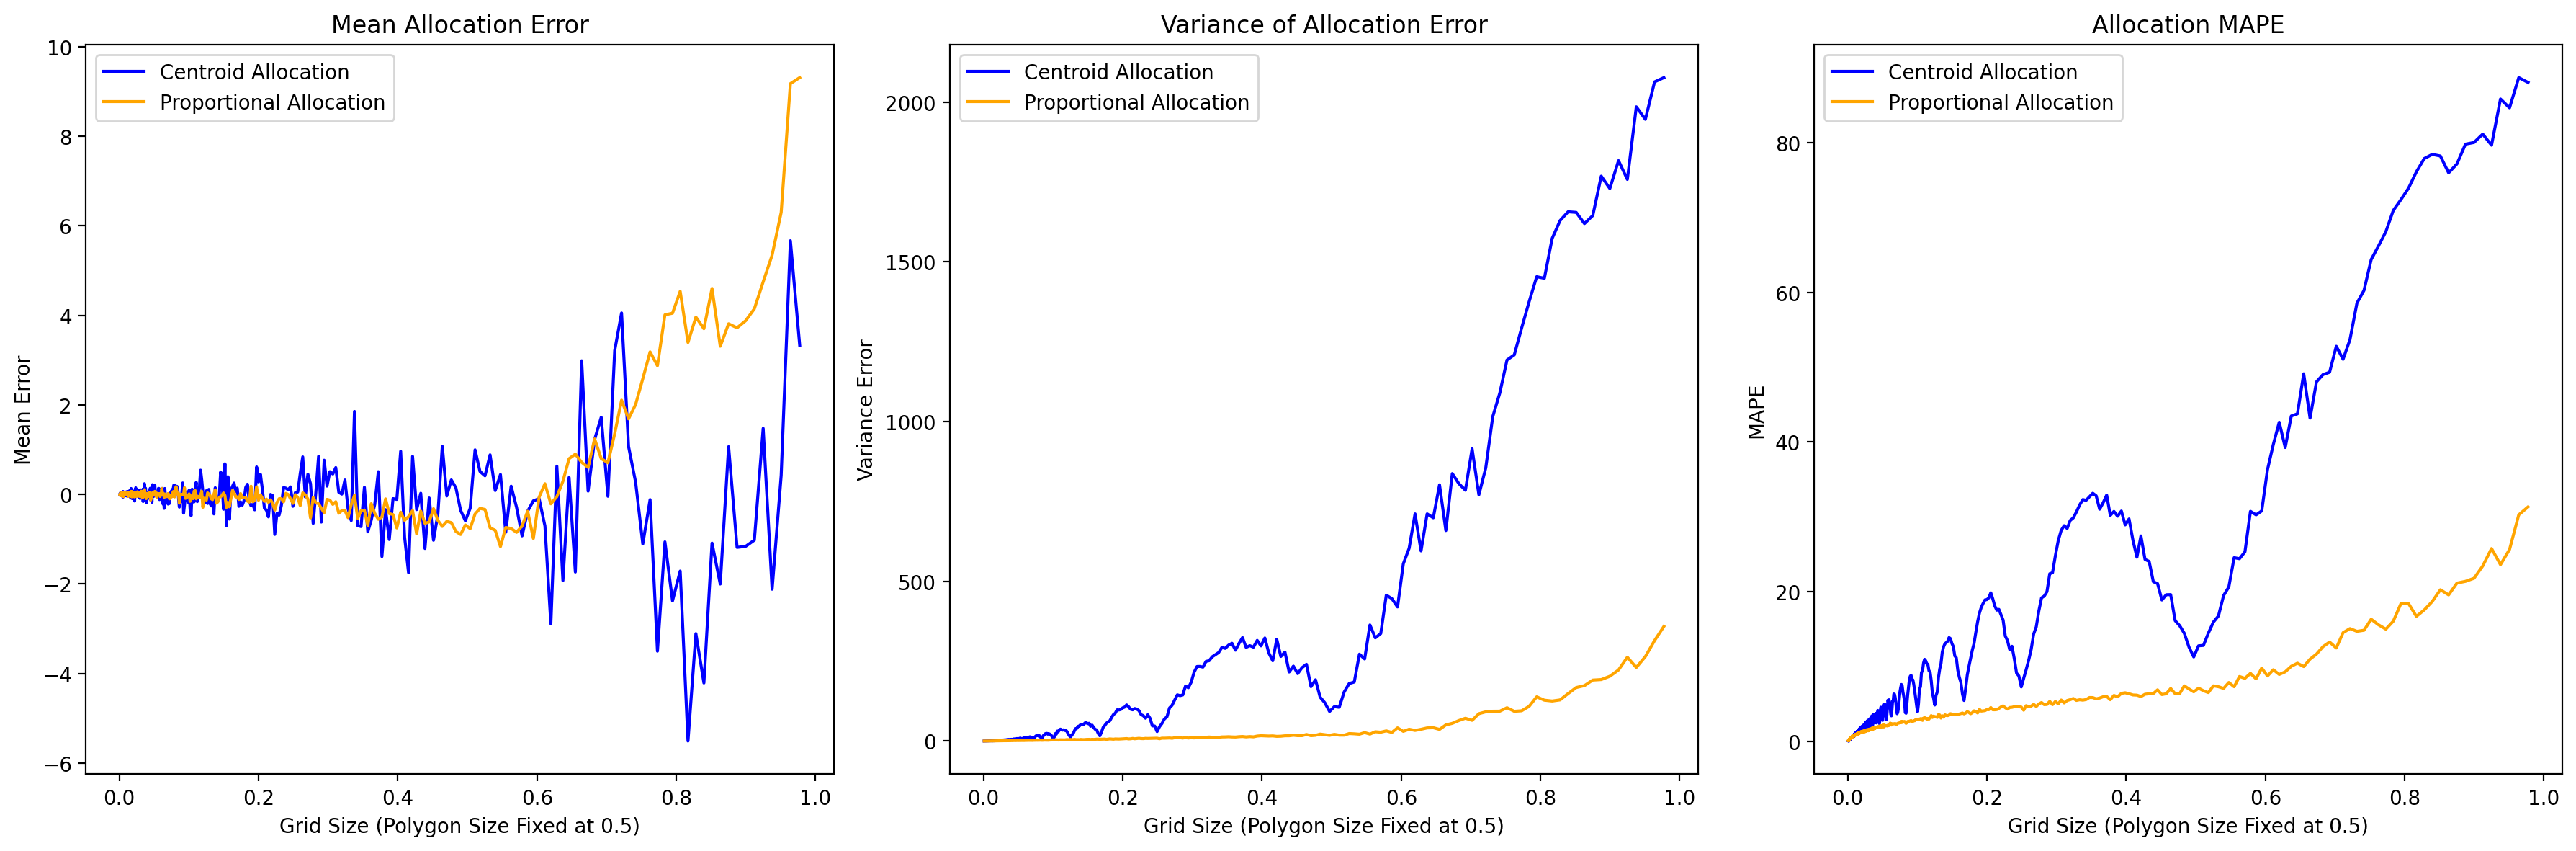

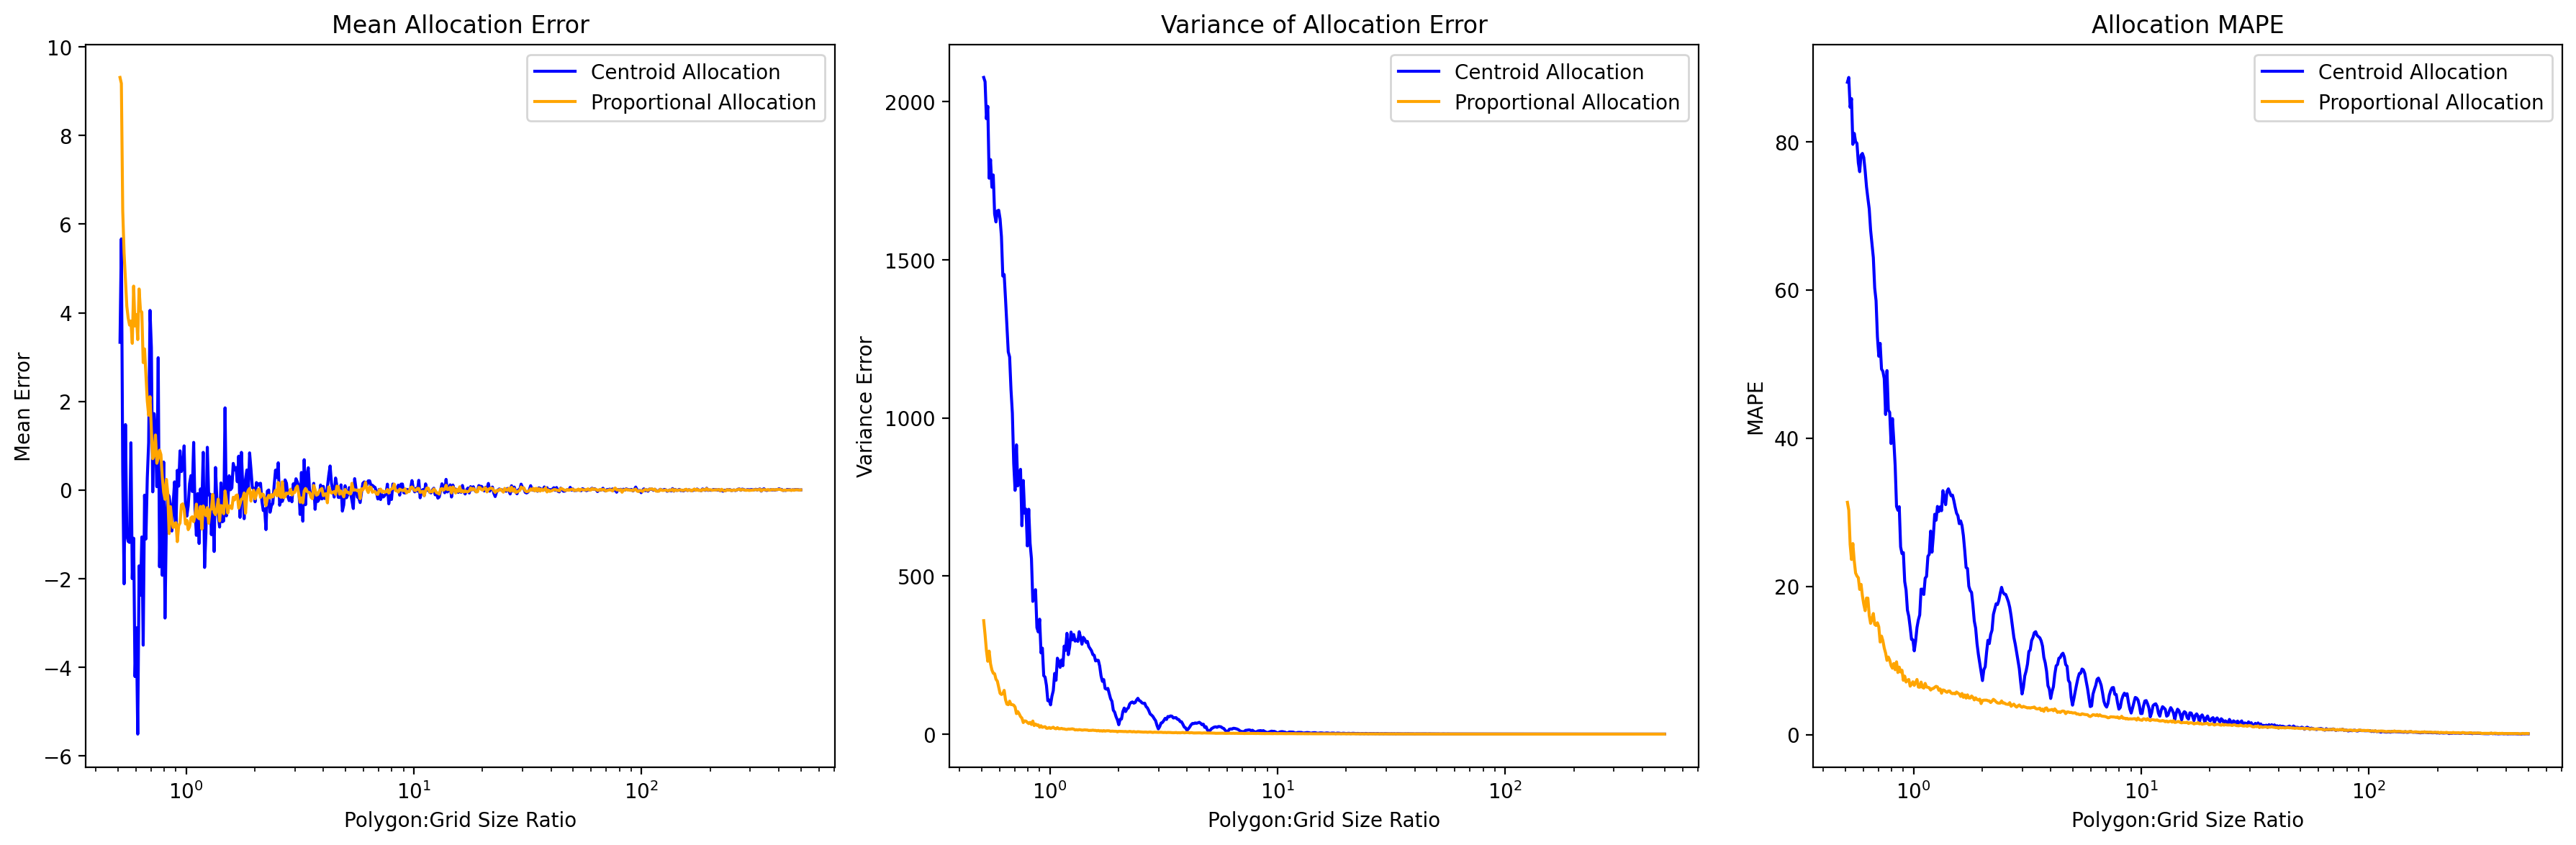

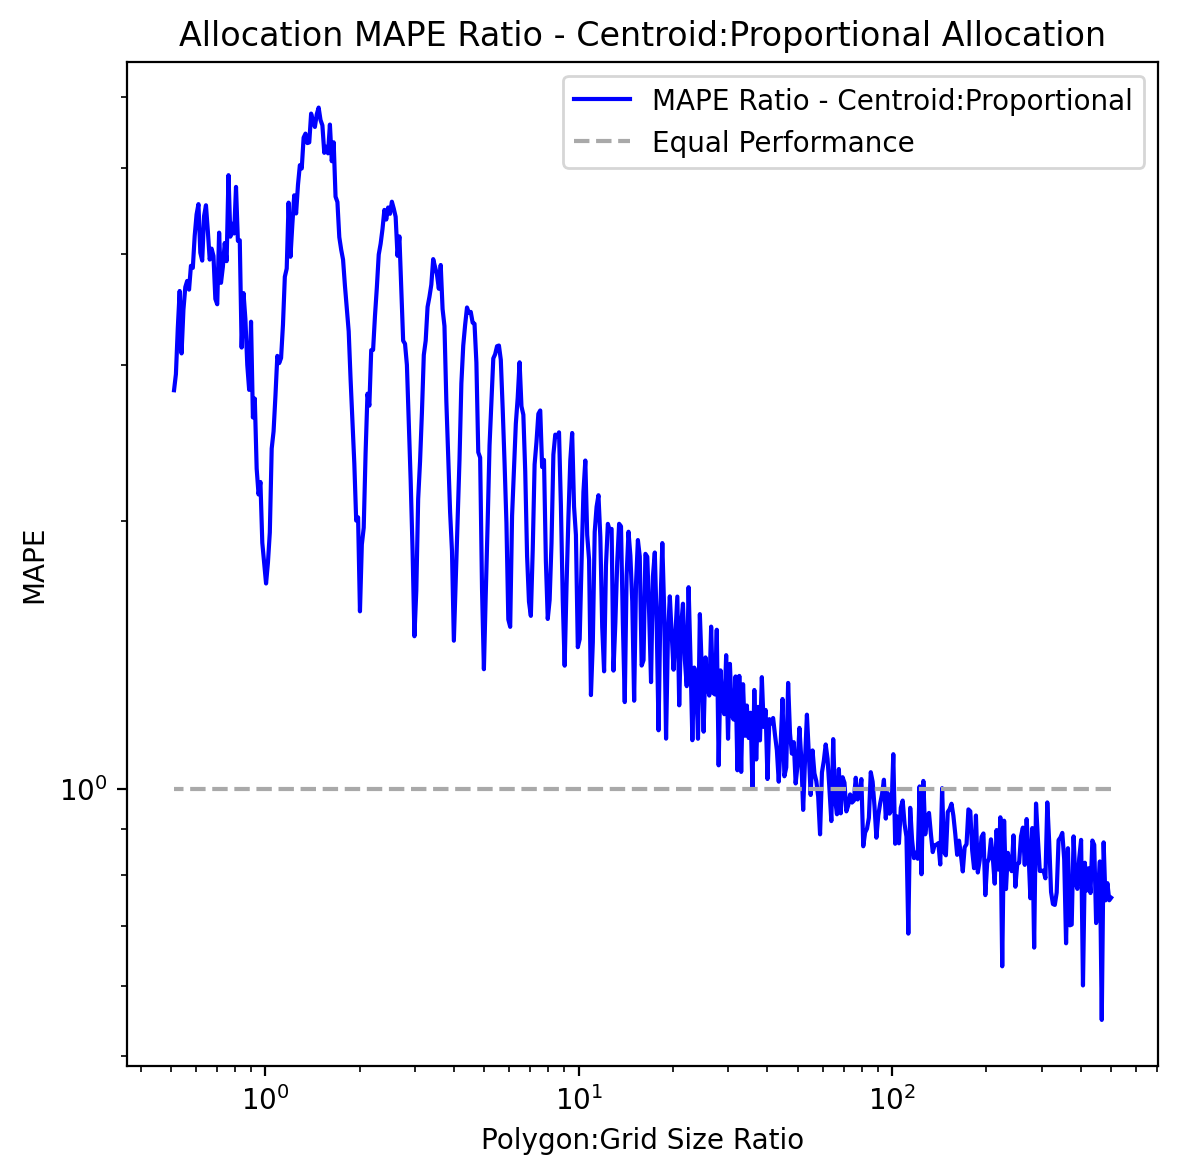

In [20]:
results_random_polygon_start_and_origin = run_simulation_random_polygon_placement_and_grid_origin(rate, start, end, trials, dg, dp, point_process)
plot_simulation_results(dg, dp, results_random_polygon_start_and_origin)
plot_simulation_results_ratio(dg, dp, results_random_polygon_start_and_origin)
plot_simulation_error_ratios(dg, dp, results_random_polygon_start_and_origin)

100%|██████████| 500/500 [00:59<00:00,  8.40it/s]


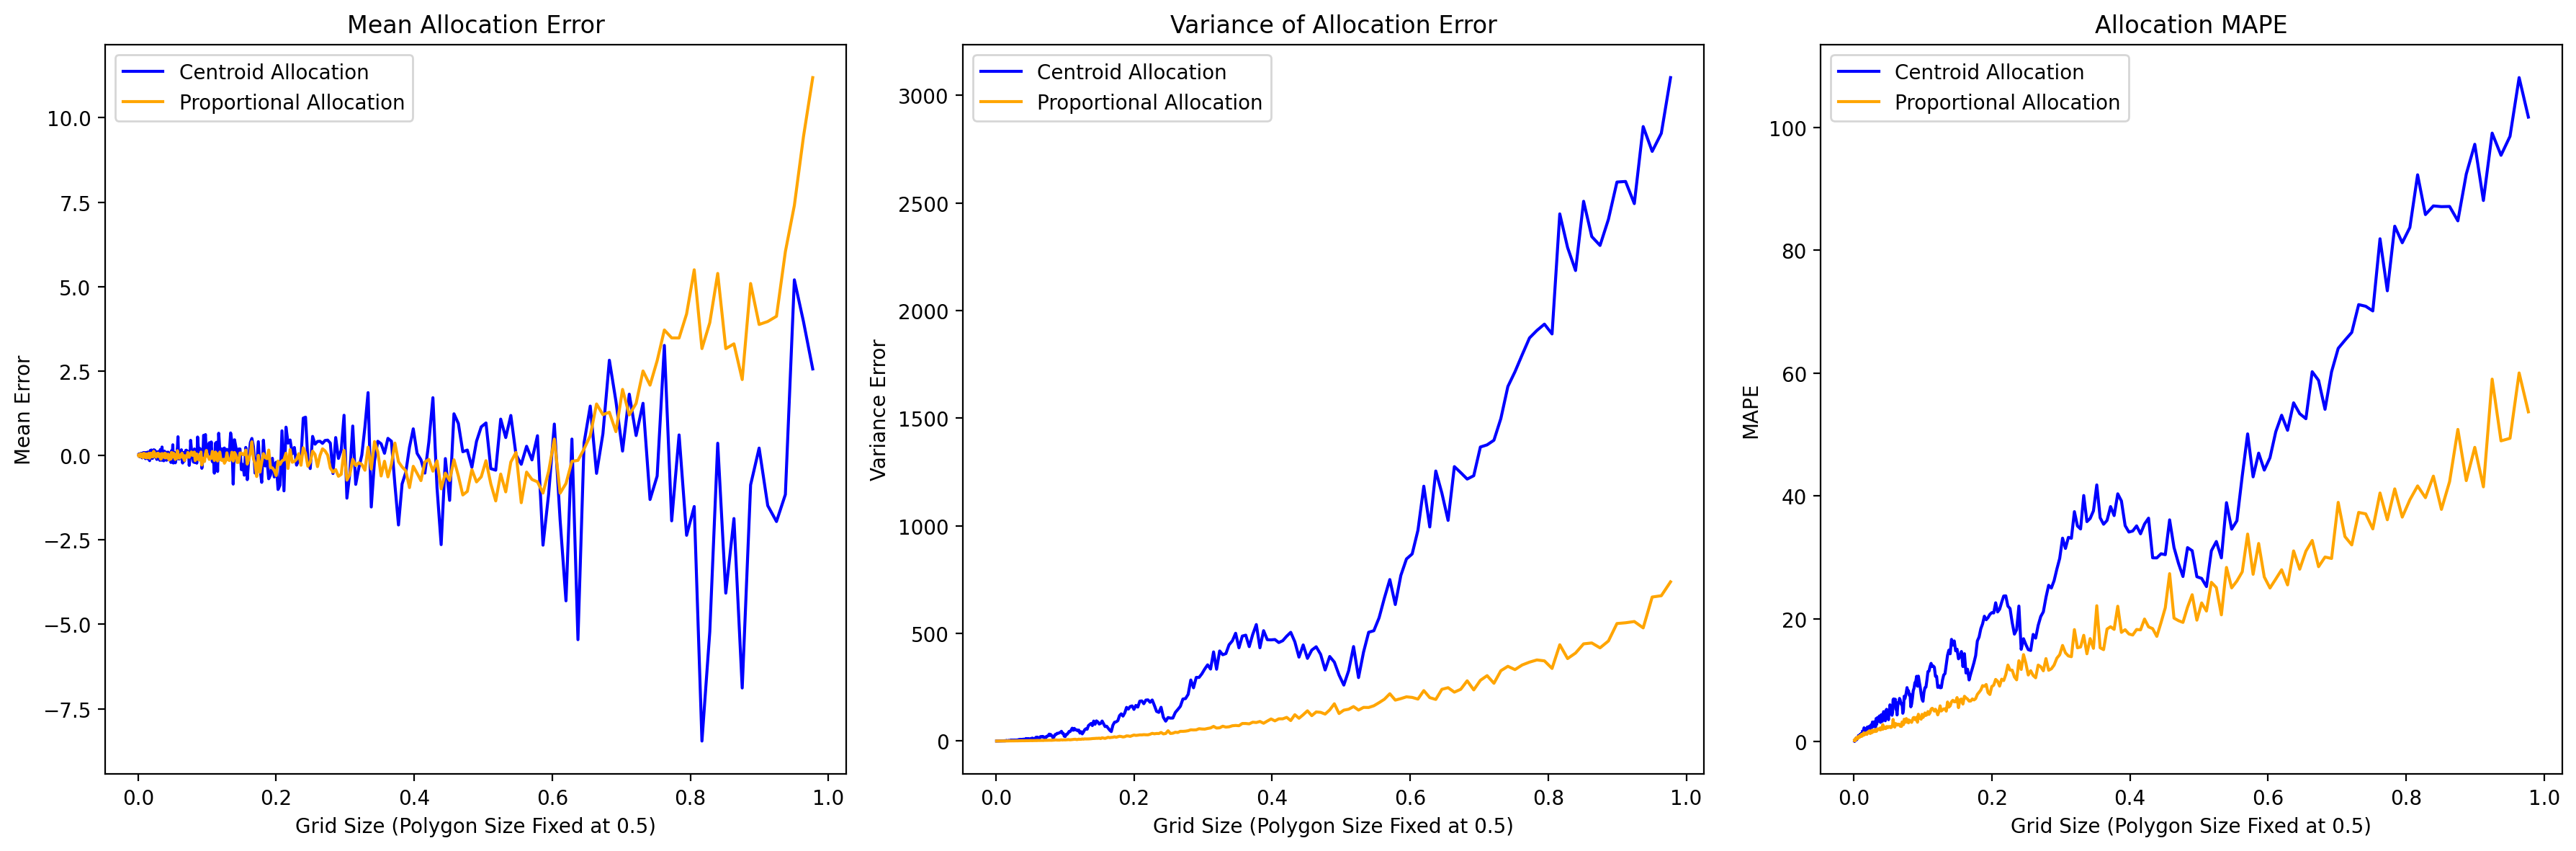

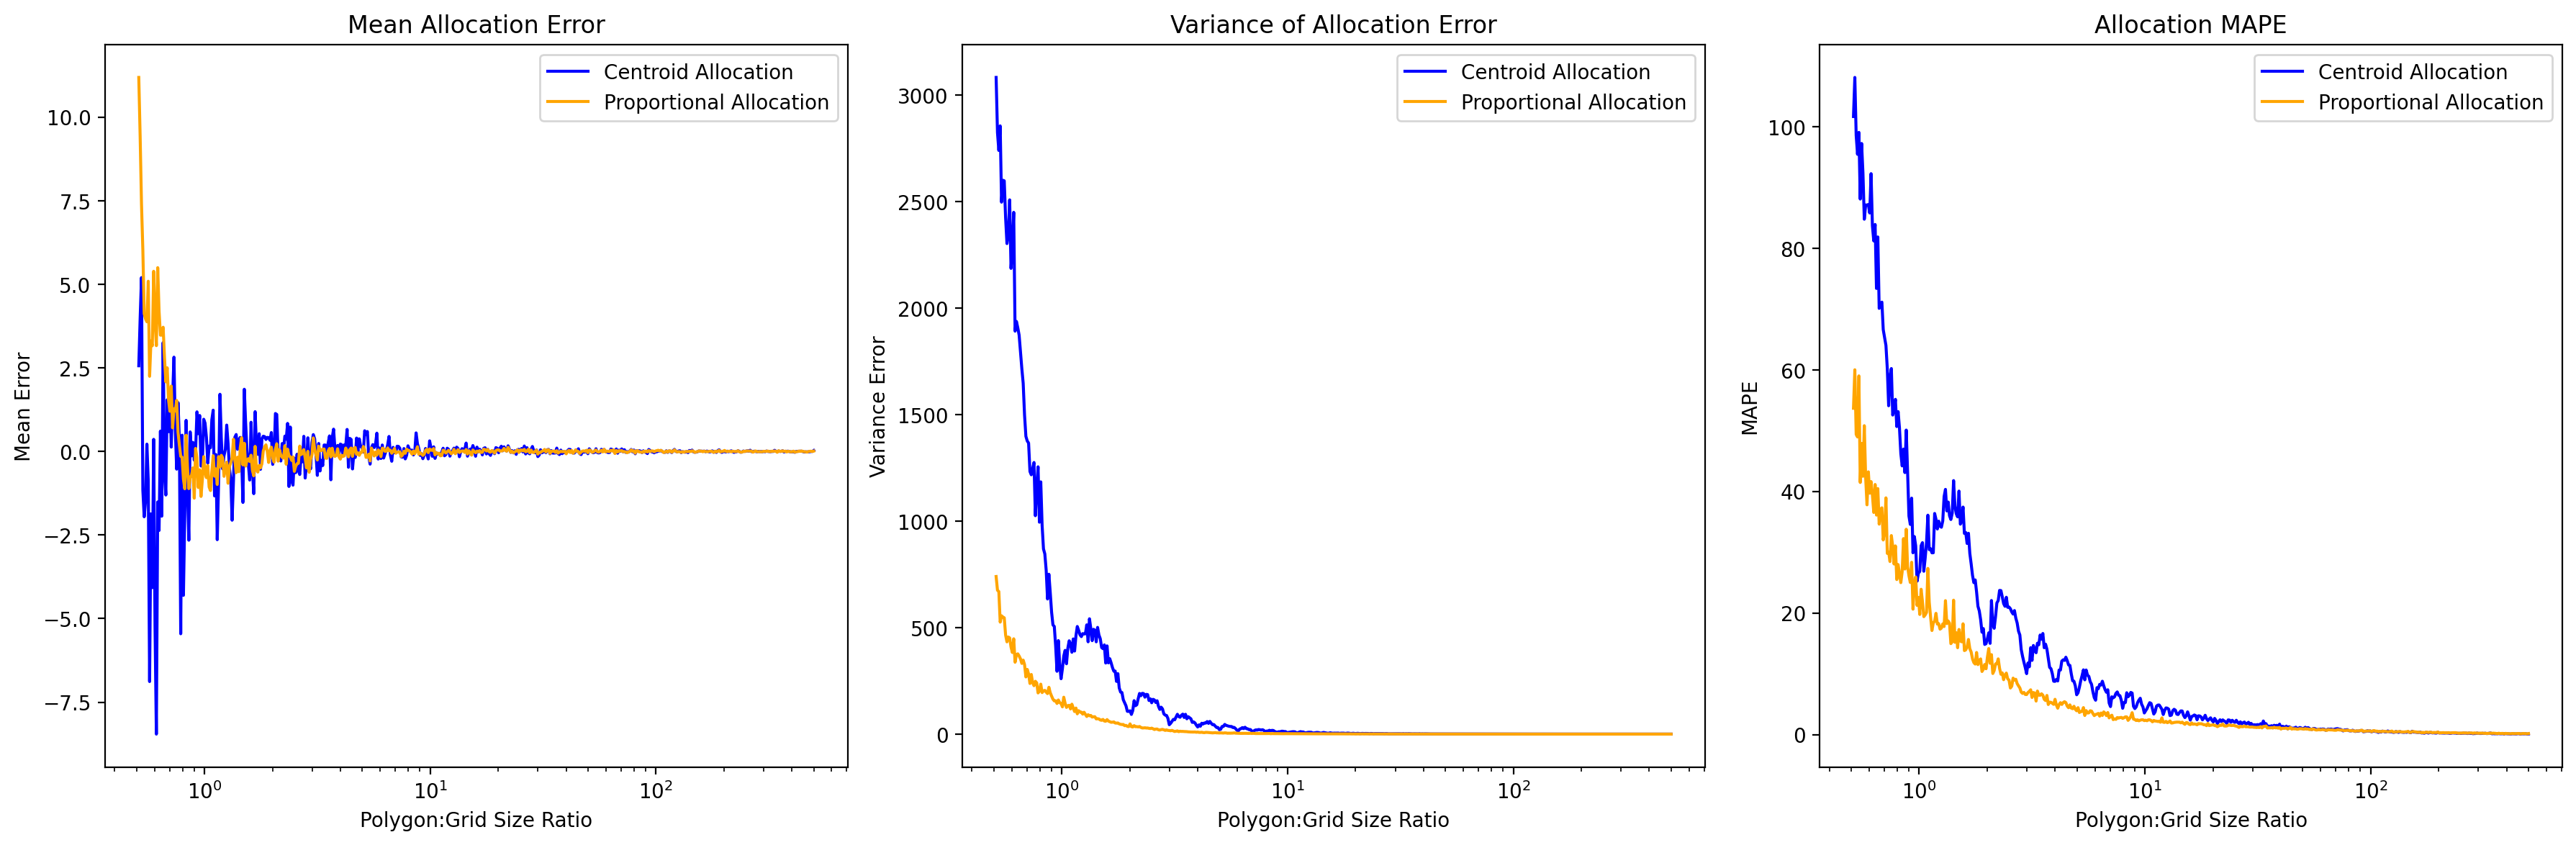

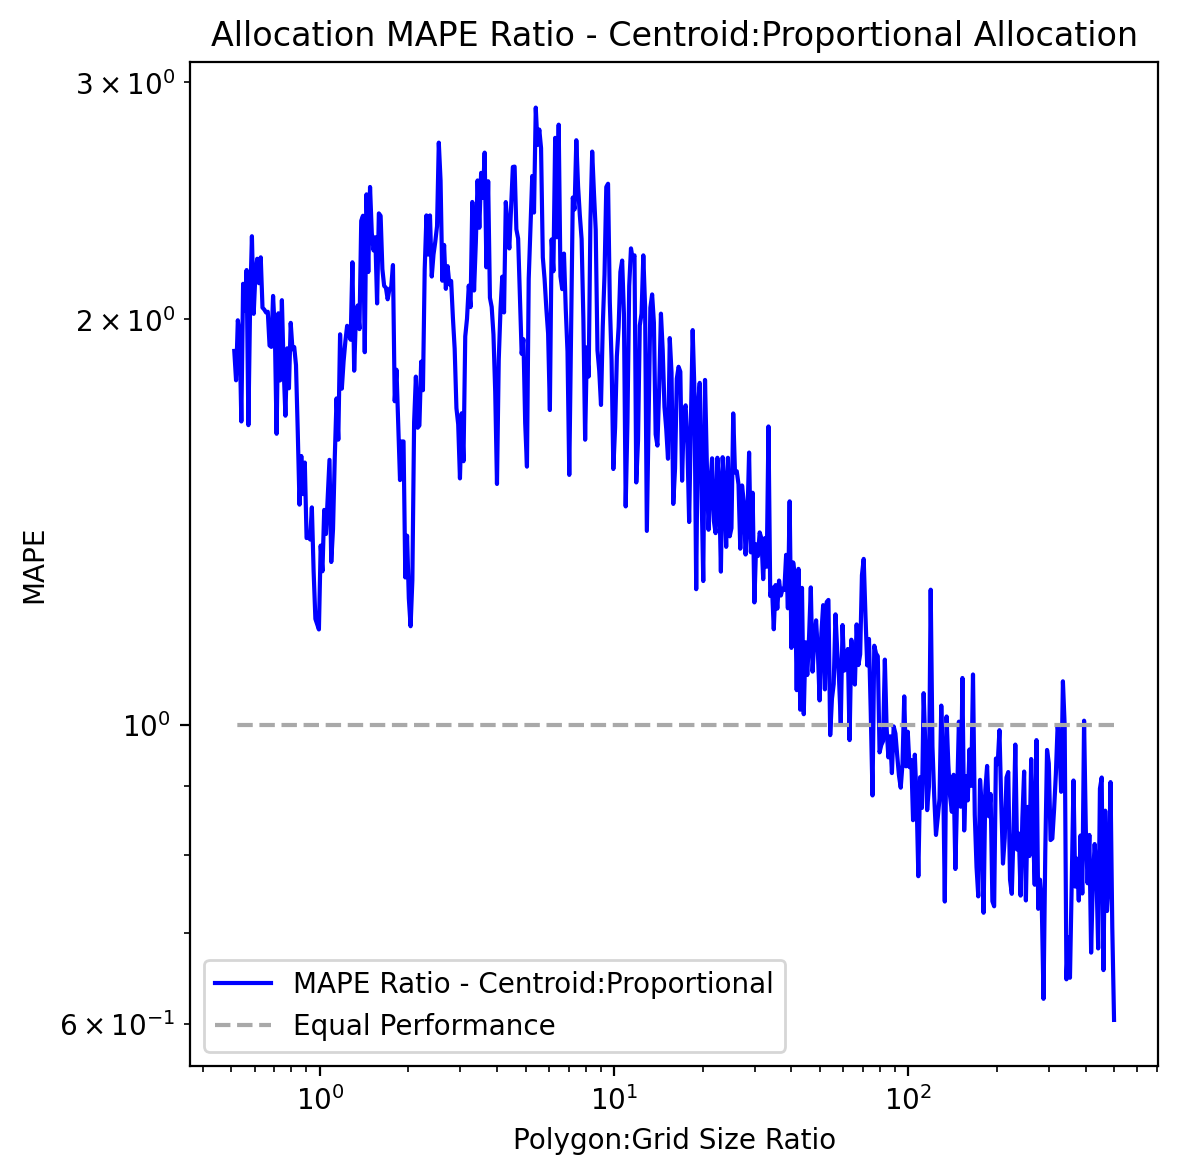

In [21]:
point_process = sample_generator['neyman-scott']
results_random_polygon_start_and_origin = run_simulation_random_polygon_placement_and_grid_origin(rate, start, end, trials, dg, dp, point_process)
plot_simulation_results(dg, dp, results_random_polygon_start_and_origin)
plot_simulation_results_ratio(dg, dp, results_random_polygon_start_and_origin)
plot_simulation_error_ratios(dg, dp, results_random_polygon_start_and_origin)

In [ ]:
trials = 200
point_process_poisson = sample_generator['poisson']
point_process_neyman = sample_generator['neyman-scott']
point_process_lgcp = sample_generator['lgcp']
results_poisson = run_simulation_random_polygon_placement_and_grid_origin(rate, start, end, trials, dg, dp, point_process_poisson)
results_neyman = run_simulation_random_polygon_placement_and_grid_origin(rate, start, end, trials, dg, dp, point_process_neyman)
results_lgcp = run_simulation_random_polygon_placement_and_grid_origin(rate, start, end, trials, dg, dp, point_process_lgcp)
results = [results_poisson, results_neyman, results_lgcp]
names = ['Homogenous Poisson Point Process', 'Inhomogeneous Neyman-Scott Point Process', 'Inhomogeneous Log-Gaussian Cox Point Process']


100%|██████████| 500/500 [10:51<00:00,  1.30s/it]


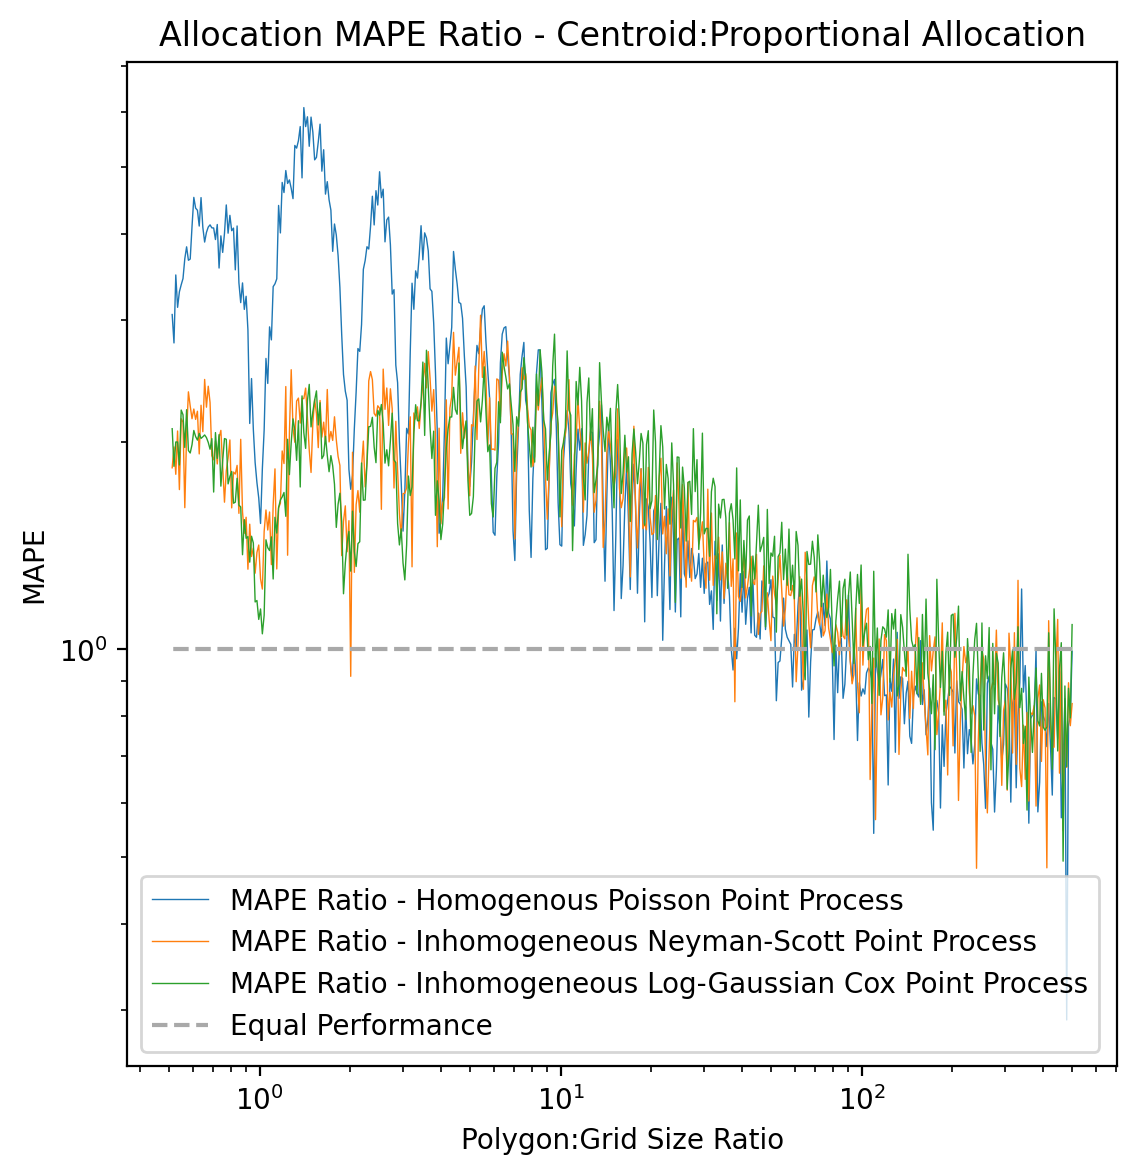

In [33]:
plot_simulation_error_ratios_multiple(dg, dp, results, names)

In [24]:
trials = 2000
point_process_poisson = sample_generator['poisson']
point_process_neyman = sample_generator['neyman-scott']
results_poisson = run_simulation_random_polygon_placement_and_grid_origin(rate, start, end, trials, dg, dp, point_process_poisson)
results_neyman = run_simulation_random_polygon_placement_and_grid_origin(rate, start, end, trials, dg, dp, point_process_neyman)
results = [results_poisson, results_neyman]
names = ['Homogenous Poisson Point Process', 'Inhomogenous Neyman-Scott Point Process']

100%|██████████| 500/500 [03:56<00:00,  2.11it/s]


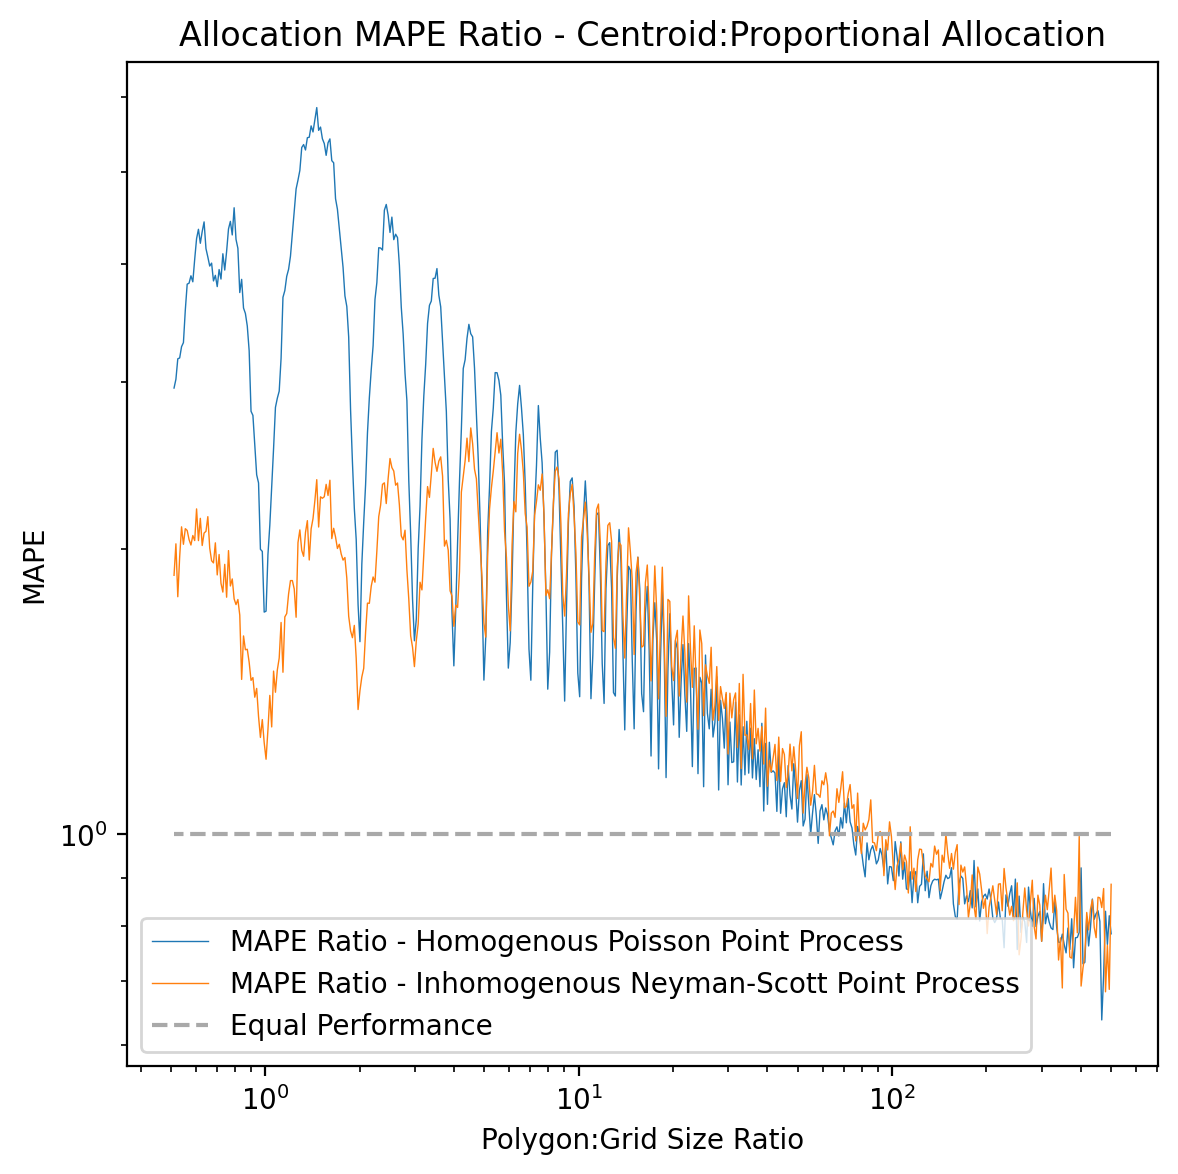

In [25]:
plot_simulation_error_ratios_multiple(dg, dp, results, names)